## Описание задачи

Данные, представленные в таблице, нанесите на график.
```
       x         f(t)    
 ----------------------
    2.5134       0    
    2.0443       0.05
    1.6684       0.10
    1.3664       0.15
    1.1232       0.20
    0.9269       0.25
    0.7679       0.30
    0.6389       0.35
    0.5338       0.40
    0.4479       0.45
    0.3776       0.50
    0.3197       0.55
    0.2720       0.60
    0.2325       0.65
    0.1997       0.70
    0.1723       0.75
    0.1493       0.80
    0.1301       0.85
    0.1138       0.90
    0.1000       0.95
    0.0883       1.00
    0.0783       1.05
    0.0698       1.10
    0.0624       1.15
```
Нелинейным методом наименьших квадратов аппроксимируйте данные моделью в виде суммы $3$ экспонент
$$
f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x} + \beta_3 e^{-\lambda_3 x},
$$
Рассмотрите различные начальные приближения к $\beta_1$, $\beta_2$, $\beta_3$, $\lambda_1$, $\lambda_2$,$\lambda_3$.
Чему равна результирующая суммарная ошибка?
Насколько чувствительны результирующие значения к начальным значениям?
Как изменится результат, если в модели оставить одну или две экспоненты?
Для одной экспоненты сведите задачу к линейной задаче наименьших квадратов.

### Импорт необходимых модулей

In [154]:
import numpy as np # Библиотека для работы с массивами 
import matplotlib.pyplot as plt # Научная графика
%matplotlib inline 
# Магический метод, позволяющий выводить графики в браузере
from scipy import linalg # Модуль операций линейной алгебры
from scipy.optimize import curve_fit

Исходные данные задачи занесем в массивы

In [155]:
x = np.array([2.5134, 2.0443, 1.6684, 1.3664, 1.1232, 0.9269, 0.7679, 0.6389, 0.5338, 0.4479, 0.3776, 0.3197, 0.2720, 0.2325, 0.1997,
             0.1723, 0.1493, 0.1301, 0.1138, 0.1000, 0.0833, 0.0783, 0.0698, 0.0624])
y = np.arange(0, 1.2, 0.05)

Исходные точки на координатной плоскости

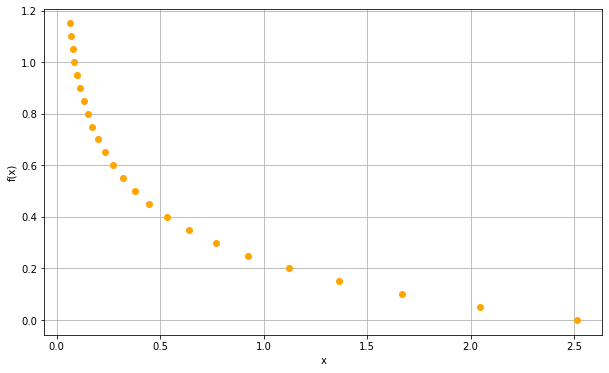

In [156]:
plt.figure(figsize=(10, 6)) # задаем размер графика
plt.plot(x, y, 'o', color='orange')
plt.grid() # выводим сетку
plt.xlabel('x')
plt.ylabel('f(x)')
pass

In [157]:
def fit_func(x, beta_1, beta_2, beta_3, lamb_1, lamb_2, lamb_3):
    return beta_1 * np.exp(-lamb_1 * x) + beta_2 * np.exp(-lamb_2 * x) + beta_3 * np.exp(-lamb_3 * x)

In [158]:
params, cov = curve_fit(fit_func, x, y, method='trf')
beta_1, beta_2, beta_3, lamb_1, lamb_2, lamb_3 = params
y_fit = fit_func(x, beta_1, beta_2, beta_3, lamb_1, lamb_2, lamb_3)
print(f'Неизвестные коэффициенты: {params}')

Неизвестные коэффициенты: [ 5.28504722  0.70193436  0.78380739 72.13900066 10.29897498  1.25752339]


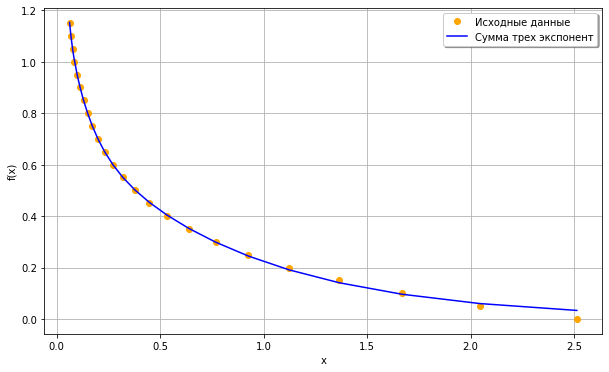

In [159]:
plt.figure(figsize=(10, 6)) # задаем размер графика
plt.plot(x, y, 'o', color='orange', label='Исходные данные')
plt.plot(x, y_fit, color='blue', label='Сумма трех экспонент')
plt.grid() # выводим сетку
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)
pass

In [160]:
print(f'Сумма всех квадратов отклонений = {sum((y_fit - y) ** 2)}')

Сумма всех квадратов отклонений = 0.0018446086466099693


## Начальные приближения коэффициентов

Рассмотрим случай, когда $ \beta_1 = \beta_2 = \beta_3 = 1$

Тогда функция принимает вид $$ f(x) = e^{-\lambda_1 x} + e^{-\lambda_2 x} + e^{-\lambda_3 x} $$

Сумма всех квадратов отклонений = 0.015090387948661884


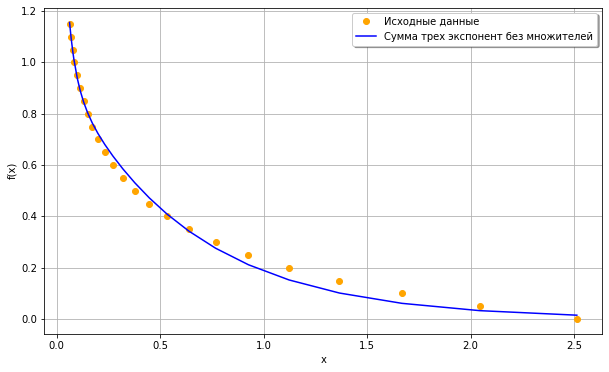

In [161]:
def fit_func_without_b(x, lamb_1, lamb_2, lamb_3):
    return np.exp(-lamb_1 * x) + np.exp(-lamb_2 * x) + np.exp(-lamb_3 * x)
params, cov = curve_fit(fit_func_without_b, x, y, method='trf')
lamb_1, lamb_2, lamb_3 = params
y_fiting = fit_func_without_b(x, lamb_1, lamb_2, lamb_3)

plt.figure(figsize=(10, 6)) # задаем размер графика
plt.plot(x, y, 'o', color='orange', label='Исходные данные')
plt.plot(x, y_fiting, color='blue', label='Сумма трех экспонент без множителей')
plt.grid() # выводим сетку
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)

print(f'Сумма всех квадратов отклонений = {sum((y_fiting - y) ** 2)}')
pass

Увеличив параметры $\beta$ до 2 получаем:

Сумма всех квадратов отклонений = 0.9478728331546269


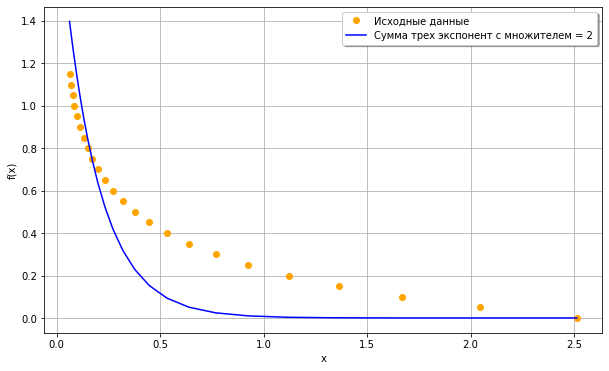

In [162]:
def fit_func_without_b(x, lamb_1, lamb_2, lamb_3):
    return 2*np.exp(-lamb_1 * x) + 2*np.exp(-lamb_2 * x) + 2*np.exp(-lamb_3 * x)
params, cov = curve_fit(fit_func_without_b, x, y, method='trf')
lamb_1, lamb_2, lamb_3 = params
y_fiting2 = fit_func_without_b(x, lamb_1, lamb_2, lamb_3)

plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='orange', label='Исходные данные')
plt.plot(x, y_fiting2, color='blue', label='Сумма трех экспонент с множителем = 2')
plt.grid() # выводим сетку
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)

print(f'Сумма всех квадратов отклонений = {sum((y_fiting2 - y) ** 2)}')
pass

Видно, что аппроксимирующая функция чувствительна ко множителям перед экспонентами, так как изменение их всего на единицу, ухудшает результат почти в 60 раз

## Две экспоненты

$$
f(x) = \beta_1 e^{-\lambda_1 x} + \beta_2 e^{-\lambda_2 x}
$$

In [80]:
def fit_func_2(x, beta_1, beta_2, lamb_1, lamb_2):
    return beta_1 * np.exp(-lamb_1 * x) + beta_2 * np.exp(-lamb_2 * x)

In [81]:
params, cov = curve_fit(fit_func_2, x, y, method='trf')
beta_1, beta_2, lamb_1, lamb_2 = params
y_fit_2 = fit_func_2(x, beta_1, beta_2, lamb_1, lamb_2)
print(f'Неизвестные коэффициенты: {params}')

Неизвестные коэффициенты: [ 1.31332199 -0.14910042  2.05936041  2.05942768]


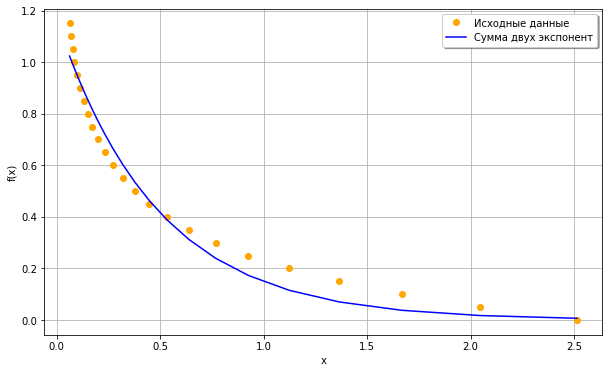

In [82]:
plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='orange', label='Исходные данные')
plt.plot(x, y_fit_2, color='blue', label='Сумма двух экспонент')
plt.grid() 
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)
pass

In [83]:
print(f'Сумма всех квадратов отклонений = {sum((y_fit_2 - y) ** 2)}')

Сумма всех квадратов отклонений = 0.08630322341822358


## Одна экспонента и сведение к линейному МНК

$$
f(x) = \beta_1 e^{-\lambda_1 x}
$$

In [84]:
def fit_func_1(x, beta_1, lamb_1):
    return beta_1 * np.exp(-lamb_1 * x)

In [85]:
params, cov = curve_fit(fit_func_1, x, y, method='trf')
beta_1, lamb_1, = params
y_fit_1 = fit_func_1(x, beta_1, lamb_1)
print(f'Неизвестные коэффициенты: {params}')

Неизвестные коэффициенты: [1.16421904 2.05933831]


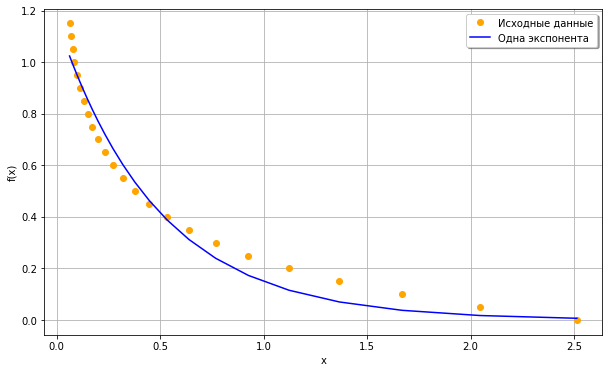

In [86]:
plt.figure(figsize=(10, 6)) 
plt.plot(x, y, 'o', color='orange', label='Исходные данные')
plt.plot(x, y_fit_1, color='blue', label='Одна экспонента')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)
pass

In [87]:
print(f'Сумма всех квадратов отклонений = {sum((y_fit_1 - y) ** 2)}')

Сумма всех квадратов отклонений = 0.08630322341544899


Для сведения задачи к линейной необходимо прологарифмировать левую и правую часть: $f(x) = \beta_1 e^{-\lambda_1 x}$. 
В итоге получаем: $$ ln(f(x)) = ln(\beta_1) - \lambda_1 x $$

Обозначим $Y = ln(f(x))$ и $B = ln(\beta_1)$, тогда полученное выражение $$ Y = B -\lambda_1 x $$ будет линейным отномительно искомых параметров

In [90]:
Y = np.log(y[1:]) # исключим первый элемент массива y = 0, т.к. ln(0) не существует
Y

array([-2.99573227, -2.30258509, -1.89711998, -1.60943791, -1.38629436,
       -1.2039728 , -1.04982212, -0.91629073, -0.7985077 , -0.69314718,
       -0.597837  , -0.51082562, -0.43078292, -0.35667494, -0.28768207,
       -0.22314355, -0.16251893, -0.10536052, -0.05129329,  0.        ,
        0.04879016,  0.09531018,  0.13976194])

Воспользуемся функцией `lstsq`, находящая неизвестные коэффициенты $B$ и $ \lambda_1 $, принимающая на вход матрицу X вида: $$X = 
\left(
\begin{array}{cc}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m \\
\end{array}
\right)
$$

In [127]:
X = np.stack((np.ones(len(x) - 1), x[1:])).T # из двух строк транспонируем матрицу, приводя к нужному виду
coef, residuals, rank, sv = linalg.lstsq(X, Y)
B = coef[0]
lamb = coef[1]
YY = B + lamb*x[1:] # функция линейной регрессии с найденными коэффициентами

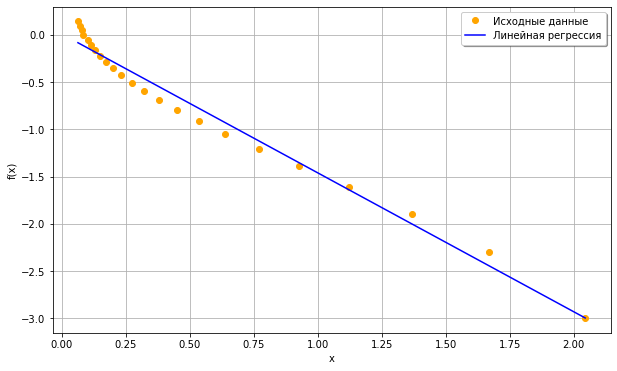

In [128]:
plt.figure(figsize=(10, 6)) 
plt.plot(x[1:], Y, 'o', color='orange', label='Исходные данные')
plt.plot(x[1:], YY, color='blue', label='Линейная регрессия')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend(shadow=True)
pass

In [129]:
print(f'Сумма всех квадратов отклонений = {sum((YY - Y) ** 2)}')

Сумма всех квадратов отклонений = 0.30020364954557927
